Data Cleaning 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sqlalchemy import create_engine
import sys
sys.path.append("../scripts/")
from clean_data import DataCleaner

cleaner = DataCleaner()


In [2]:
import warnings
warnings.filterwarnings('ignore')


### Read Data into Dataframe 

In [3]:
import pandas as pd
from sqlalchemy import create_engine
database_name = 'telecom_analysis'
table_name= 'xdr_data'
connection_params = { "host": "localhost", "user": "postgres", "password": "123",
"port": "5432", "database": database_name}
engine = create_engine(f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}")
# str or SQLAlchemy Selectable (select or text object)
missing_values = ["n/a", "na", "--"]
sql_query = 'SELECT * FROM xdr_data'

telecom_df = pd.read_sql(sql_query, con= engine)
telecom_df.replace(missing_values, np.nan, inplace=True)





In [4]:
telecom_df.head() 

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,...,"15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,...,"20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,...,"19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,...,"21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,...,"15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"


In [5]:
telecom_df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [6]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

### Cleaning Duplicate data and Removing Whitespaces

In [7]:
telecom_df = cleaner.drop_duplicate(telecom_df)
telecom_df = cleaner.remove_whitespace_column(telecom_df)
telecom_df.columns

Index(['Bearer_Id', 'Start', 'Start_ms', 'End', 'End_ms', 'Dur._(ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last_Location_Name', 'Avg_RTT_DL_(ms)',
       'Avg_RTT_UL_(ms)', 'Avg_Bearer_TP_DL_(kbps)', 'Avg_Bearer_TP_UL_(kbps)',
       'TCP_DL_Retrans._Vol_(Bytes)', 'TCP_UL_Retrans._Vol_(Bytes)',
       'DL_TP_<_50_Kbps_(%)', '50_Kbps_<_DL_TP_<_250_Kbps_(%)',
       '250_Kbps_<_DL_TP_<_1_Mbps_(%)', 'DL_TP_>_1_Mbps_(%)',
       'UL_TP_<_10_Kbps_(%)', '10_Kbps_<_UL_TP_<_50_Kbps_(%)',
       '50_Kbps_<_UL_TP_<_300_Kbps_(%)', 'UL_TP_>_300_Kbps_(%)',
       'HTTP_DL_(Bytes)', 'HTTP_UL_(Bytes)', 'Activity_Duration_DL_(ms)',
       'Activity_Duration_UL_(ms)', 'Dur._(ms).1', 'Handset_Manufacturer',
       'Handset_Type', 'Nb_of_sec_with_125000B_<_Vol_DL',
       'Nb_of_sec_with_1250B_<_Vol_UL_<_6250B',
       'Nb_of_sec_with_31250B_<_Vol_DL_<_125000B',
       'Nb_of_sec_with_37500B_<_Vol_UL',
       'Nb_of_sec_with_6250B_<_Vol_DL_<_31250B',
       'Nb_of_sec_with_6250B_<_Vol_UL_<_37500B',


Count, List and Depict Frequency Distribution of Unique Values 

In [8]:
#Count of unique values of a column
print('\nNumber of unique values => ' + str(len(telecom_df['TCP_DL_Retrans._Vol_(Bytes)'].unique())))


Number of unique values => 54400


In [9]:
#List of all unique values of a column
print('\nUnique values are => \n\n' + str(pd.Series(telecom_df['TCP_DL_Retrans._Vol_(Bytes)'].unique()).sort_values(ascending=True)))


Unique values are => 

23567               2.00
2031                4.00
10341               6.00
2178                8.00
7399               11.00
              ...       
51132   4,289,487,601.00
14595   4,289,876,615.00
47489   4,291,380,336.00
29343   4,294,425,570.00
0                    NaN
Length: 54400, dtype: float64


In [10]:
#Frequency Distribution of unique values of a column
print('\nFrequency distribution of unique values => \n\n'+ str(telecom_df['TCP_DL_Retrans._Vol_(Bytes)'].value_counts(dropna=False).sort_values(ascending = False)))


Frequency distribution of unique values => 

TCP_DL_Retrans._Vol_(Bytes)
NaN              88146
1,330.00           433
2,660.00           219
38.00              200
92.00              192
                 ...  
6,424,413.00         1
9,168.00             1
5,237,705.00         1
10,698,305.00        1
16,552,848.00        1
Name: count, Length: 54400, dtype: int64


### Number of Columns and Rows

In [11]:
print(f" There are {telecom_df.shape[0]} rows and {telecom_df.shape[1]} columns")

 There are 150001 rows and 55 columns


### Changing Datatypes as Necessary 

In [12]:
# Changing data Types of Start and End to Datetype
# Changing datatypes of Bearer ID, IMSI, MSISDN/Number, IMEI and  Handset Type to String 
telecom_df = cleaner.convert_to_datetime(telecom_df)
telecom_df = cleaner.convert_to_string(telecom_df)
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer_Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start_ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End_ms                                    150000 non-null  float64       
 5   Dur._(ms)                                 150000 non-null  float64       
 6   IMSI                                      150001 non-null  object        
 7   MSISDN/Number                             150001 non-null  object        
 8   IMEI                                      150001 non-null  object        
 9   Last_Location_N

### Dealing with Missing Value

In [13]:
#Calculate Missing values in the dataset
percentage=cleaner.percent_missing(telecom_df)
print ("The dataset contains", percentage, "% missing values.")


The dataset contains 12.46 % missing values.


In [14]:
telecom_df.isna().sum()

Bearer_Id                                        0
Start                                            1
Start_ms                                         1
End                                              1
End_ms                                           1
Dur._(ms)                                        1
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last_Location_Name                            1153
Avg_RTT_DL_(ms)                              27829
Avg_RTT_UL_(ms)                              27812
Avg_Bearer_TP_DL_(kbps)                          1
Avg_Bearer_TP_UL_(kbps)                          1
TCP_DL_Retrans._Vol_(Bytes)                  88146
TCP_UL_Retrans._Vol_(Bytes)                  96649
DL_TP_<_50_Kbps_(%)                            754
50_Kbps_<_DL_TP_<_250_Kbps_(%)                 754
250_Kbps_<_DL_TP_<_1_Mbps_(%)                  754
DL_TP_>_1_Mbps_(%)             

In [15]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer_Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start_ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End_ms                                    150000 non-null  float64       
 5   Dur._(ms)                                 150000 non-null  float64       
 6   IMSI                                      150001 non-null  object        
 7   MSISDN/Number                             150001 non-null  object        
 8   IMEI                                      150001 non-null  object        
 9   Last_Location_N

### Categorize Numerical and Categorical Columns

In [16]:
numeric_columns = telecom_df.select_dtypes(include=['number']).columns.to_list()
categorical_columns = telecom_df.select_dtypes(include=['object','datetime64[ns]']).columns.to_list()


Skew Calculation for Numeric Columns

In [17]:
telecom_df[numeric_columns].skew(axis=0, skipna=True)

Start_ms                                    0.00
End_ms                                     -0.00
Dur._(ms)                                   3.95
Avg_RTT_DL_(ms)                            62.91
Avg_RTT_UL_(ms)                            28.46
Avg_Bearer_TP_DL_(kbps)                     2.59
Avg_Bearer_TP_UL_(kbps)                     4.50
TCP_DL_Retrans._Vol_(Bytes)                15.95
TCP_UL_Retrans._Vol_(Bytes)                84.11
DL_TP_<_50_Kbps_(%)                        -2.30
50_Kbps_<_DL_TP_<_250_Kbps_(%)              3.27
250_Kbps_<_DL_TP_<_1_Mbps_(%)               4.57
DL_TP_>_1_Mbps_(%)                          5.37
UL_TP_<_10_Kbps_(%)                        -8.99
10_Kbps_<_UL_TP_<_50_Kbps_(%)              10.94
50_Kbps_<_UL_TP_<_300_Kbps_(%)             21.88
UL_TP_>_300_Kbps_(%)                       36.17
HTTP_DL_(Bytes)                            38.94
HTTP_UL_(Bytes)                            32.47
Activity_Duration_DL_(ms)                   5.87
Activity_Duration_UL

<Axes: xlabel='Start_ms', ylabel='Density'>

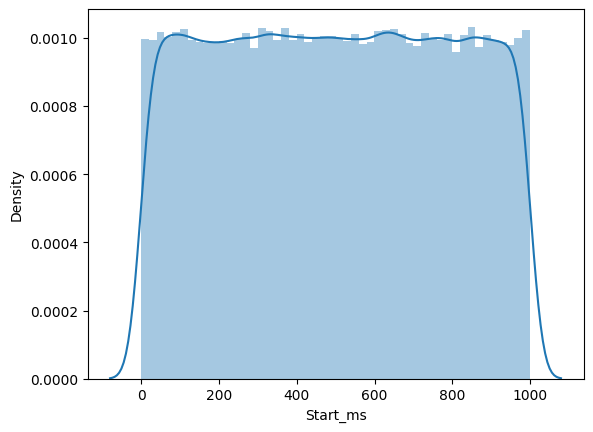

In [18]:
sns.distplot(telecom_df['Start_ms'])

<Axes: >

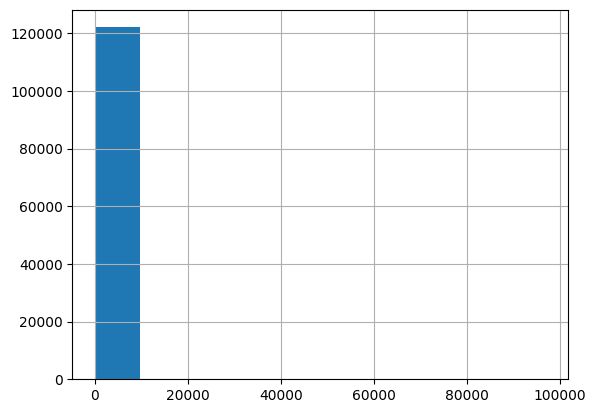

In [19]:
telecom_df['Avg_RTT_DL_(ms)'].hist()

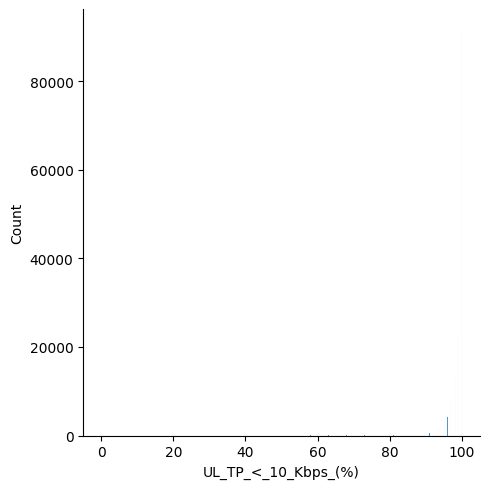

In [20]:
sns.displot(data=telecom_df, x=telecom_df['UL_TP_<_10_Kbps_(%)'])

Spearation on Skewed column and unskewed column

In [21]:
skewed_numeric_columns = list(telecom_df[numeric_columns].skew(axis=0, skipna=True)
                              .index[abs(telecom_df[numeric_columns].skew(axis=0, skipna=True)) > 0.50])

unskewed_numeric_columns = list(telecom_df[numeric_columns].skew(axis=0, skipna=True)
                                .index[(telecom_df[numeric_columns].skew(axis=0, skipna=True) >= -0.50) &
                                       (telecom_df[numeric_columns].skew(axis=0, skipna=True) <= 0.50)])

Filling missing values with Median and Mean for numerical columns

In [22]:
# Skewed data to be filled using median which is a recommendation.
telecom_df = cleaner.fill_missing_values_numeric(telecom_df, "median", skewed_numeric_columns)

# Unskewed data(distributed) to be filled using mean which is recommeded. 
telecom_df = cleaner.fill_missing_values_numeric(telecom_df, "mean" , unskewed_numeric_columns)

Filling missing values with Mode for categorical columns

In [23]:
telecom_df = cleaner.fill_missing_values_categorical(telecom_df, "mode" )

In [24]:
telecom_df.isnull().sum()

Bearer_Id                                   0
Start                                       0
Start_ms                                    0
End                                         0
End_ms                                      0
Dur._(ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last_Location_Name                          0
Avg_RTT_DL_(ms)                             0
Avg_RTT_UL_(ms)                             0
Avg_Bearer_TP_DL_(kbps)                     0
Avg_Bearer_TP_UL_(kbps)                     0
TCP_DL_Retrans._Vol_(Bytes)                 0
TCP_UL_Retrans._Vol_(Bytes)                 0
DL_TP_<_50_Kbps_(%)                         0
50_Kbps_<_DL_TP_<_250_Kbps_(%)              0
250_Kbps_<_DL_TP_<_1_Mbps_(%)               0
DL_TP_>_1_Mbps_(%)                          0
UL_TP_<_10_Kbps_(%)                         0
10_Kbps_<_UL_TP_<_50_Kbps_(%)     

In [25]:
#Calculate Missing values in the dataset
percentage=cleaner.percent_missing(telecom_df)
print ("The dataset contains", percentage, "% missing values.")

The dataset contains 0.0 % missing values.


### Save Cleaned Data

In [27]:
save_to = "../data/" 
cleaner.save_data(telecom_df, f"{save_to}cleaned_tel_data.csv")


Complete!
